## Machine Learning - Ex.7


In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import multivariate_normal # *** NEW !! ***


### 1-D Gaussian example


Recall the univariate normal (Gaussian) distribution:

$$ f(x)=\mathcal{N}(x\ |\ \mu,\sigma^2)=\frac{1}{\sqrt{(2\pi\sigma^2)}}\exp\left[-\frac{(x-\mu)^2}{2\sigma^2} \right]$$


We will use: **```scipy.stats.multivariate_normal```**,  to generate the random variable, sample data from it and calculate its distribution (its probability density function):



sample = 
 [ 2.88078041  3.41253338  1.81036069  3.34386626  1.16088217  2.61893834
  1.65373228  1.93379339  3.29923809  3.24918709  2.49462483  2.40761063
  3.29342957  2.20611351  2.38965239  2.4788459   2.35762918  2.50876506
  3.20230686  2.89949303  1.6018263   1.65826506  1.71833283  2.49871597
  2.93428262  2.02380051  2.71887495  2.77500752  3.04593812  3.2807383 ]


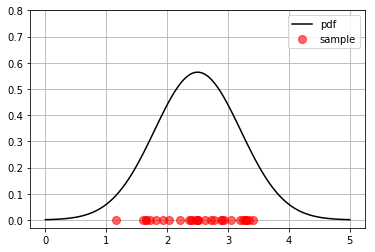

In [2]:
# first, define a normal random variable (rv):
rv = multivariate_normal(mean=2.5, cov=0.5)  

# then we can use it to generate n=30 random samples:
x = rv.rvs(30)
print('sample = \n',x)

#  we can also use it to calculate the probability density function (pdf):
xx = np.linspace(0,5,100)
yy = rv.pdf(xx)

plt.plot(xx, yy,'-k') # plot the pdf
plt.plot(x,np.zeros_like(x),'or',markersize=8,alpha=0.6)
plt.ylim([-0.03,0.8])
plt.legend(['pdf','sample'])
plt.grid()

### 2-D Gaussian example


Recall the multivariate normal (Gaussian) distribution:

$$ f(x)=\mathcal{N}(x\ |\ \mu,\Sigma)=\frac{1}{\sqrt{(2\pi)^d \det\Sigma}}\exp\left[-\frac{1}{2}(x-\mu)^T \Sigma^{-1} (x-\mu) \right] $$


where $x$ and $\mu$ are $(d\times 1)$ vectors, and $\Sigma$ is a $(d\times d)$ matrix.

Again, we will use: **```scipy.stats.multivariate_normal```**,  to generate the random variable, sample data from it and calculate its distribution (its probability density function):

[]

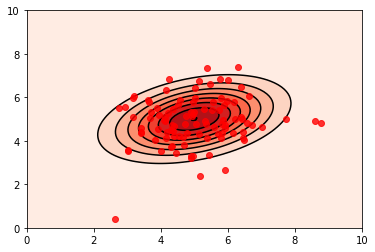

In [3]:
# define a normal random variable (rv):
rv2 = multivariate_normal(mean=[5,5], cov=[[2.0, 0.5], [0.5, 1]])

# use it to generate n=100 random samples:
x = rv2.rvs(100)

#   calculate the probability density function (pdf) over the 2D grid:
xx = np.linspace(0,10,100)
X1,X2 = np.meshgrid(xx,xx)
X1X2 = np.stack((X1,X2),axis=-1)
yy = rv2.pdf(X1X2)

# plot a contour map of the 2D pdf:
plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
plt.contour(X1, X2, yy,10,colors='k') 


# plot the sampled points:
plt.plot(x[:,0],x[:,1],'or',alpha=0.8)
plt.plot()

### warm-up: fitting a Gaussian distribution

Load the dataset: ```ex7_data1.csv``` and display the data points.

Use the MLE (maximum likelihood estimator) presented in class (for $\mu$ and $\Sigma$) to fit a Gaussian distribution to the data.

Plot the contour map of the estimated distribution, together with the data points.

(200, 2)


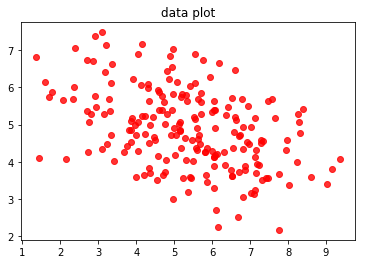

mean hat:  [ 5.330055  4.871885]
sigma hat:  [[ 2.71688343 -0.74317458]
 [-0.74317458  1.12745073]]


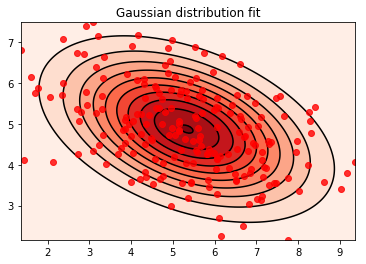

In [4]:
# your code here.. 
def mean_hat(X):
    X_T = X.T
    mean_vec = []
    for i in range(0,X_T.shape[0]):
        mean_vec += [np.sum(X_T[i])/X_T.shape[1]]
    return np.array(mean_vec)
def cov_hat(X,mean_hat):
    tmp = ((X - mean_hat))
    tmp_T = tmp.T
    sigma = np.array([[np.sum((tmp_T[i] * tmp[:,j]))/tmp.shape[0] for i in range(0,tmp_T.shape[0])] for j in range(0,tmp.shape[1])]) 
    return sigma
data=np.loadtxt('ex7_data1.csv', delimiter=',')

print(data.shape)
n,d = data.shape
#displaying data points...
plt.title("data plot")
plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
plt.show()
m_hat = mean_hat(data)
print("mean hat: ",m_hat)
c_hat = cov_hat(data,m_hat)
print("sigma hat: ",c_hat)
rv_g = multivariate_normal(mean=m_hat, cov=c_hat)
xx1 = np.linspace(min(data[:,0]),max(data[:,0]),n)
xx2 = np.linspace(min(data[:,1]),max(data[:,1]),n)
X1,X2 = np.meshgrid(xx1,xx2)
X1X2 = np.stack((X1,X2),axis=-1)
yy = rv_g.pdf(X1X2)

# plot a contour map of the 2D pdf:
plt.title("Gaussian distribution fit")
plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
plt.contour(X1, X2, yy,10,colors='k') 

# plot the sampled points:
plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
plt.show()

### Gaussian Mixture Model (GMM)


Load the dataset: ```ex7_data2.csv``` and display the data points.


(300, 2)


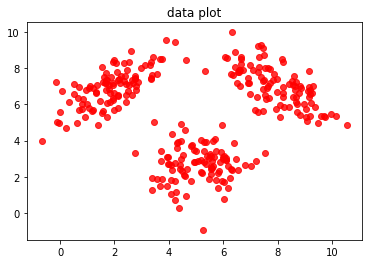

In [11]:
# your code here.. 
data=np.loadtxt('ex7_data2.csv', delimiter=',')

print(data.shape)
n,d = data.shape
#displaying data points...
plt.title("data plot")
plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
plt.show()

Clearly, a single Gaussian is not a good fit for this data. 

We will implement the E-M algorithm to fit a mixture of Gaussians to the data.

To this aim, implement the following functions:

1. ```E_step``` function that takes the GMM parameters $\{(w_c,\mu_c,\Sigma_c)\}_{c=1}^k$ and the data, and returns all the assignments $r_{i,j}\ \ (i=1,..,n\ ,\ j=1,..,k)$

2. ```M_step``` function that takes the data and the assignments matrix $r$, and re-estimate the GMM parameters.

3. ```log_likelihood``` function that calculates the log-likelihood of the GMM parameters given the data.

Finally, implement the ```GMM_EM``` algorithm and use it to fit a mixture of k=3 Gaussians to the data. Run it several times until you get a satisfying result.

- Plot a graph showing the convergence of the log-likelihood.

- Plot together a contour map for each of the Gaussians, and the original data points. 

iteration  1
iteration  2
iteration  3
iteration  4
iteration  5
iteration  6
iteration  7
iteration  8
iteration  9
iteration  10
iteration  11
iteration  12
iteration  13
iteration  14
iteration  15
iteration  16
iteration  17
iteration  18
iteration  19
iteration  20
iteration  21
iteration  22
iteration  23
iteration  24
iteration  25
iteration  26
iteration  27
iteration  28
iteration  29
iteration  30


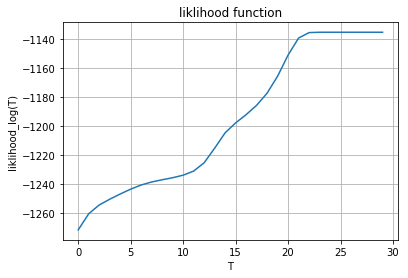

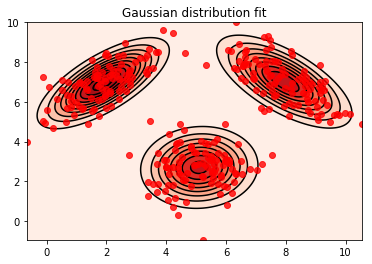

In [12]:
def log_likelihood(X,mus,sigmas,w):
    n = X.shape[0]
    k = w.shape[0]
    m_rv_for_clusters = []
    for j in range(0,k):
        m_rv_for_clusters += [multivariate_normal(mean=mus[j], cov=sigmas[j])]
    m_rv_for_clusters = np.array(m_rv_for_clusters)
    result = 0
    for i  in range(0,n):
        result += np.log(np.sum(w*np.array([[ rv.pdf(X[i]) for rv in m_rv_for_clusters ]])))
    return result
def E_step(X,w,mus,sigmas):
    n = X.shape[0]
    k = mus.shape[0]
    r = []
    for i in range(0,n):
        m_rv_for_clusters = []
        for j in range(0,k):
            m_rv_for_clusters += [multivariate_normal(mean=mus[j], cov=sigmas[j])]
        row = np.array([[ rv.pdf(X[i]) for rv in m_rv_for_clusters ]])
        divRow = np.sum(w*row)
        row = row*w/divRow
        r += [row]
    return np.array(r).reshape(n,k)
def M_step(X,r):
    n = X.shape[0]
    k = r.shape[1]
    n_j = []
    for j in range(0,k):
        n_j += [np.sum(r[:,j])]
    n_j = np.array(n_j)
    w = np.array(n_j/n)
    d= X.shape[1]
    mu = []
    for j in range(0,k):
        mu_row = []
        for i in range(0,d):
            mu_row += [np.sum(r[:,j]*X[:,i])/n_j[j]]
        mu += [mu_row]
    mu = np.array(mu)
    sigmas = []
    for j in range(0,k): 
        c_n = n_j[j]
        x_mu = X - mu[j]
        x_mu_r = x_mu.T*r[:,j]
        a = x_mu_r.dot(x_mu)/c_n
        sigmas += [a]
    sigmas = np.array(sigmas)
    return w,mu,sigmas
def GMM_EM(X,K,T = 0,printIter = True,epsilon = 0.001,stepsForConvergence = 5):
    n, d = X.shape     
    # randomly choose the starting means 
    ## as 3 of the points from datasets        
    mu = X[np.random.choice(n, K, False), :]
        
    # initialize the covariance matrices for each gaussians
    sigma = np.array([np.eye(d)] * K)
        
    # initialize the probabilities for each gaussians
    w = [1./K] * K
    #create a list for log(likelihood), and start the algorithm
    log_l_res = []
    iterationNumber = 0
    stepsConv = stepsForConvergence
    while(True):
        r = E_step(X,w,mu,sigma)
        w,mu,sigma = M_step(X,r)
        res = log_likelihood(X,mu,sigma,w)
        if(T > 0 and iterationNumber == T):
            break
        elif(stepsConv == 0):
            break
        if(T == 0 and iterationNumber > 0):
            if(np.abs(res - log_l_res[iterationNumber-1]) < epsilon):
                stepsConv = stepsConv - 1
            else:
                stepsConv = stepsForConvergence
        if(printIter and T != 0):
            print("iteration ",iterationNumber+1," out of ",T)
        elif(printIter and T== 0):
            print("iteration ",iterationNumber+1)
        log_l_res += [res]
        iterationNumber = iterationNumber + 1
    log_l_res = np.array(log_l_res)
    return mu,sigma,w,log_l_res,iterationNumber

T = 0
K = 3
n = data.shape[0]
mus,sigmas,ws,liklihood_logs,iterNum = GMM_EM(data,K,T)
plt.plot(range(0,iterNum),liklihood_logs)
plt.title("liklihood function")
plt.xlabel('T')
plt.ylabel('liklihood_log(T)')
plt.grid()
plt.show()
xx1 = np.linspace(min(data[:,0]),max(data[:,0]),n)
xx2 = np.linspace(min(data[:,1]),max(data[:,1]),n)
X1,X2 = np.meshgrid(xx1,xx2)
X1X2 = np.stack((X1,X2),axis=-1)
yy = np.zeros((n,n))
plt.title("Gaussian distribution fit")
plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
for j in range(0,K):
    rv_g = multivariate_normal(mean=mus[j], cov=sigmas[j])
    yy += rv_g.pdf(X1X2)
plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
plt.contour(X1, X2, yy,10,colors='k') 
plt.show()

Load the last dataset: ```ex7_data3.csv``` and display the data points.

Fit GMMs with K=1, K=2, K=3 and K=4 to the data, and present each of the results.


(700, 2)


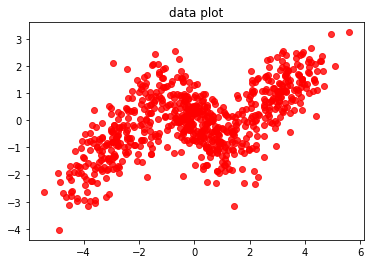

calculating.. K= 1 out of 4


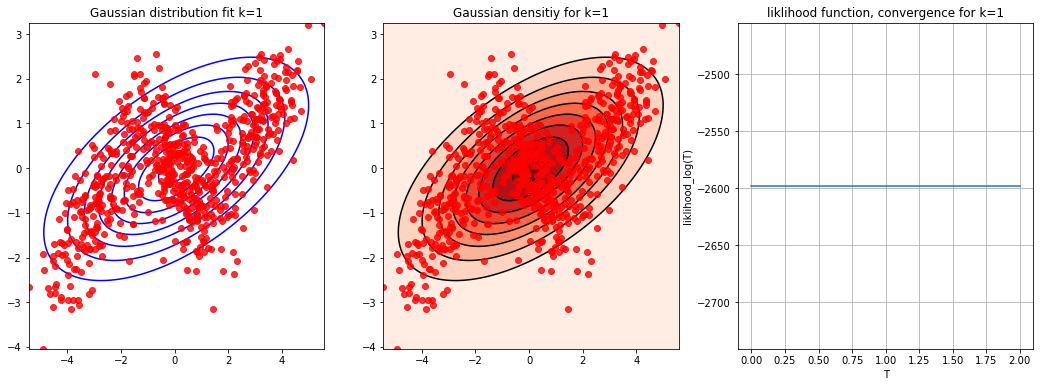

calculating.. K= 2 out of 4


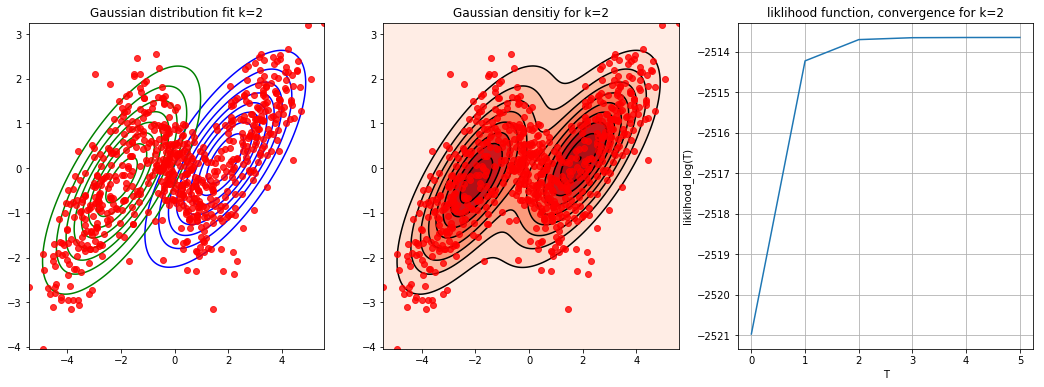

calculating.. K= 3 out of 4


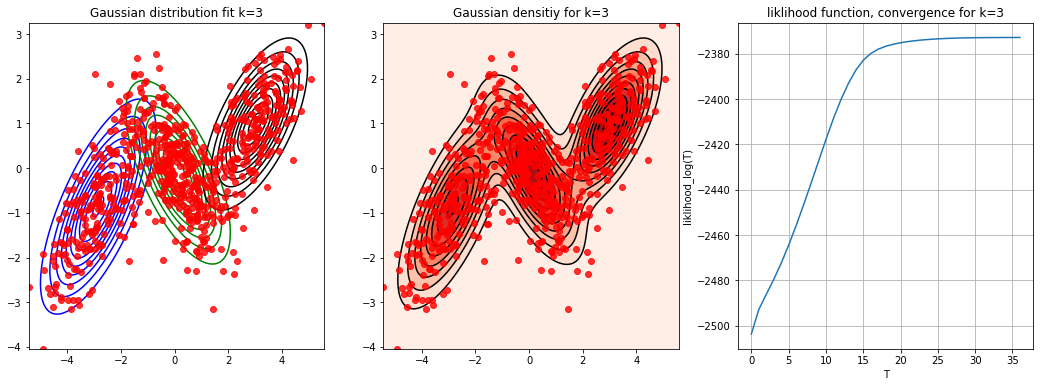

calculating.. K= 4 out of 4


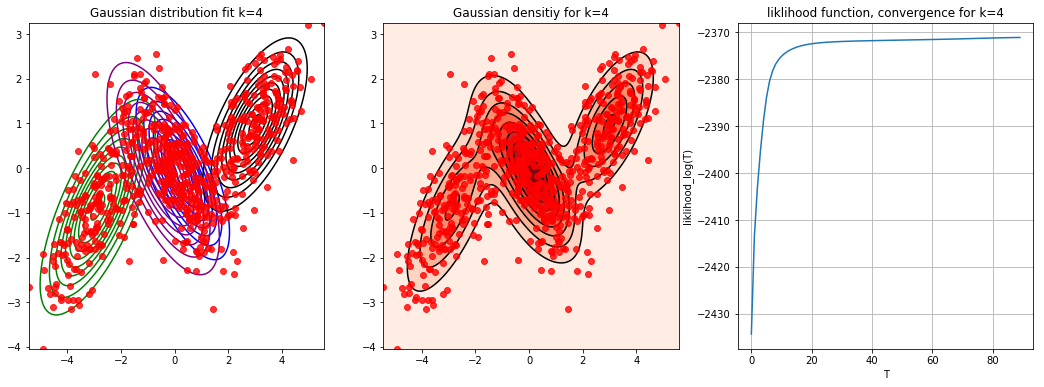

In [13]:
# your code here.. 
data=np.loadtxt('ex7_data3.csv', delimiter=',')

print(data.shape)
n,d = data.shape
#displaying data points...
plt.title("data plot")
plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
plt.show()
#building mesh grid for contour
xx1 = np.linspace(min(data[:,0]),max(data[:,0]),n)
xx2 = np.linspace(min(data[:,1]),max(data[:,1]),n)
X1,X2 = np.meshgrid(xx1,xx2)
X1X2 = np.stack((X1,X2),axis=-1)
#starting GMM_EM
total_ks = 4
#T_s = [1,15,15,10]
clrs = ['blue','green','black','purple','red']
for k in range(1,total_ks+1):
    T = 0#T_s[k - 1]
    plt.figure(figsize=(18,6))
    plt.subplot(1,3,1)
    plt.title('Gaussian distribution fit k={}'.format(k))
    plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
    print("calculating.. K=",k,"out of",total_ks)
    mus,sigmas,ws,liklihood_logs,iterNum = GMM_EM(data,k,T,False,0.01,2)
    yyAll = np.zeros((n,n))
    for j in range(0,k):
        rv_g = multivariate_normal(mean=mus[j], cov=sigmas[j])
        yy = rv_g.pdf(X1X2)
        yyAll += yy
        #plt.contourf(X1, X2, yy,10,cmap=plt.cm.Reds) 
        plt.contour(X1, X2, yy,10,colors=clrs[j])
    plt.subplot(1,3,2)
    plt.plot(data[:,0],data[:,1],'or',alpha=0.8)
    plt.title('Gaussian densitiy for k={}'.format(k))
    plt.contourf(X1, X2, yyAll,10,cmap=plt.cm.Reds)
    plt.contour(X1, X2, yyAll,10,colors='k')
    plt.subplot(1,3,3)
    plt.title('liklihood function, convergence for k={}'.format(k))
    plt.plot(range(0,iterNum),liklihood_logs)
    plt.xlabel('T')
    plt.ylabel('liklihood_log(T)')
    plt.grid()
    plt.show()
    

## Good luck !